# python-version mutation mapper based on Mingyu Yang's Perl script

In [78]:
from __future__ import division

import svgwrite
import pandas as pd
from IPython.display import SVG, display

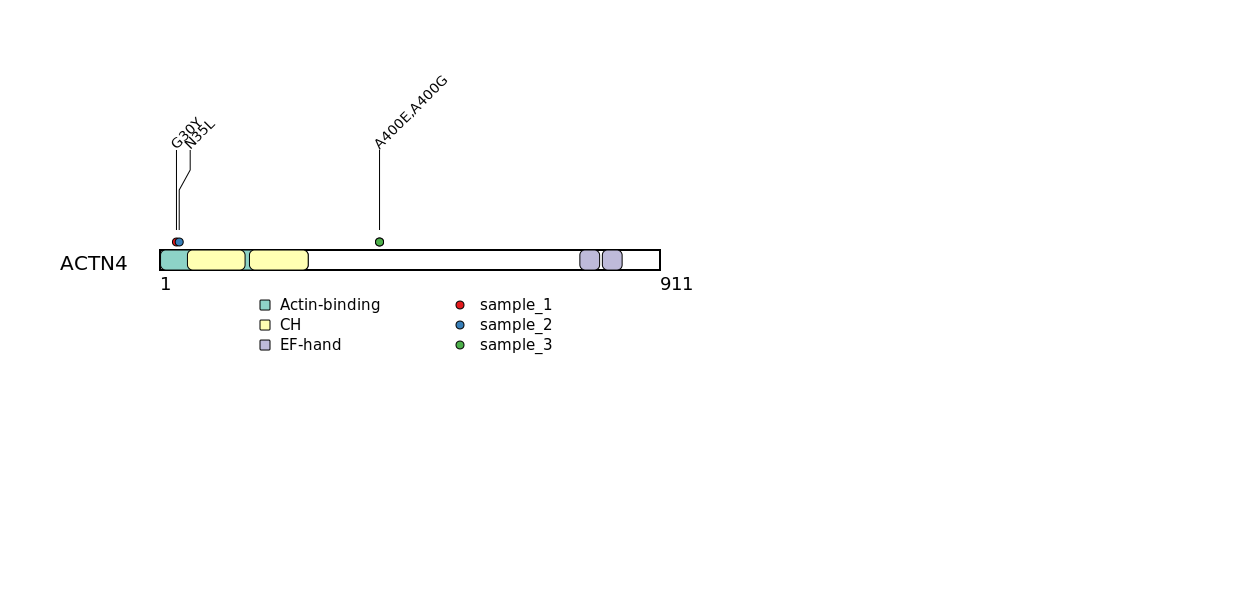

In [79]:
# show an example
display(SVG('example.svg'))

### load mutation file

In [80]:
df_mutation = pd.read_csv('mutation.tsv', sep='\t')

df_mutation

,sample,gene,nm,aachange
0,sample_1,ACTN4,NM_004924,G30Y
1,sample_1,ACTN4,NM_004924,A400E
2,sample_2,ACTN4,NM_004924,N35L
3,sample_3,ACTN4,NM_004924,A400G


### load domain file

In [81]:
df_domain = pd.read_csv('G:/data/uniprot/uniprot_fan.tsv', sep='\t')
df_domain.index = df_domain['nm']

df_domain.head()

,nm,np,uniprot,gene,len,beg,end,domain
nm,,,,,,,,
NM_001144924,NM_001144924,NP_001138396,Q96IC2,NaN,774,228;505;600,376;579;679,Exonuclease;RRM;RRM
NM_001199053,NM_001199053,NP_001185982,Q96IC2,NaN,774,228;505;600,376;579;679,Exonuclease;RRM;RRM
NM_030941,NM_030941,NP_112203,Q96IC2,NaN,774,228;505;600,376;579;679,Exonuclease;RRM;RRM
NM_130786,NM_130786,NP_570602,P04217,A1BG,495,22;114;207;300;398,113;206;299;397;495,Ig-like V-type;Ig-like V-type;Ig-like V-type;I...
NM_001198818,NM_001198818,NP_001185747,Q9NQ94,A1CF,594,56;136;231,134;218;303,RRM;RRM;RRM


### extract domain information of the given gene

In [82]:
nm = df_mutation['nm'].tolist()[0]
gene = df_mutation['gene'].tolist()[0]

prolen = df_domain.get_value(nm, 'len')

beg_list = df_domain.get_value(nm, 'beg')
beg_list = map(int, beg_list.split(';'))

end_list = df_domain.get_value(nm, 'end')
end_list = map(int, end_list.split(';'))

domain_list = df_domain.get_value(nm, 'domain').split(';')

# show
df_domain[df_domain['nm'] == nm]

,nm,np,uniprot,gene,len,beg,end,domain
nm,,,,,,,,
NM_004924,NM_004924,NP_004915,O43707,ACTN4,911,1;50;163;765;806,269;154;269;800;841,Actin-binding;CH;CH;EF-hand;EF-hand


# SVG

### parameter

In [83]:
pwidth = 1250
pheight = 600
x0 = 160
y0 = 250
length = 500
# minimum space between mutation texts
min_distance = 25

# color for domain
color_list = ['#8dd3c7', 
              '#ffffb3',
              '#bebada',
              '#fb8072',
              '#80b1d3',
              '#fdb462',
              '#b3de69',
              '#fccde5',
              '#d9d9d9']

# color for sample
color_list_2 = ['#e41a1c',
                '#377eb8',
                '#4daf4a']

### start svg

In [84]:
dwg = svgwrite.Drawing(filename='test.svg', debug=True, size=(pwidth, pheight))

### protein rectangle, coordinate and gene symbol

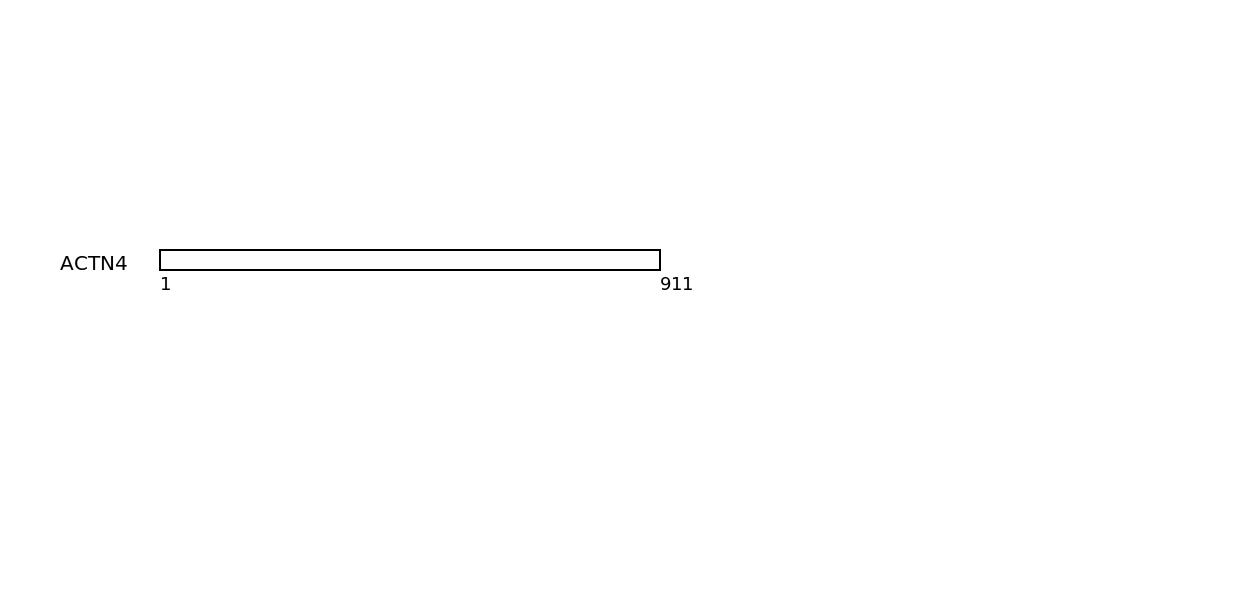

In [85]:
# rectangle
dwg.add(dwg.rect(insert=(x0, y0),
                 size=(length, 20),
                 fill='none',
                 stroke='black',
                 stroke_width=2))

# coordinate
dwg.add(dwg.text('1',
                 insert=(x0, y0 + 40),
                 style="font-size:18"))

dwg.add(dwg.text(str(prolen),
                 insert=(x0 + length, y0 + 40),
                 style="font-size:18"))

# gene label
dwg.add(dwg.text(gene,
                 insert=(x0 - 100, y0 + 20),
                 style="font-size:20"))

dwg.save()
display(SVG('test.svg'))

### domain rectangle and legend

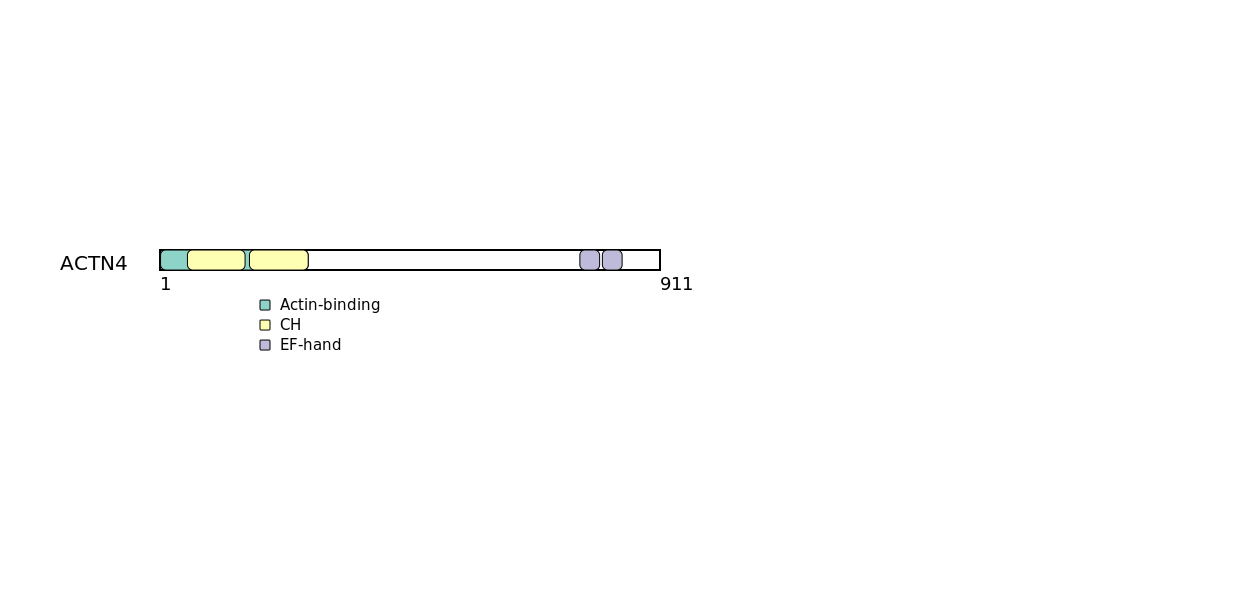

In [86]:
# use same color for the same domains
dict_domain_color = {}

for i in xrange(len(domain_list)):
    beg = beg_list[i]
    end = end_list[i]
    domain = domain_list[i]
    domain_len = end -beg + 1
    
    if domain in dict_domain_color:
        color = dict_domain_color[domain]
    else:
        color = color_list[len(dict_domain_color)]
    
    dwg.add(dwg.rect(insert=(x0 + length * beg / prolen, y0),
                     size=(length * domain_len / prolen, 20),
                     rx=5, ry=5,
                     stroke='black',
                     stroke_width=1,
                     fill_opacity=1,
                     fill=color))
    
    # legend shape
    if domain not in dict_domain_color:
        dwg.add(dwg.rect(insert=(x0 + 100, y0 + 50 + 20 * len(dict_domain_color)),
                         size=(10, 10),
                         rx=1, ry=1,
                         stroke='black',
                         stroke_width=1,
                         fill_opacity=1,
                         fill=color))

        # legend text
        dwg.add(dwg.text(domain,
                         insert=(x0 + 120, y0 + 60 + 20 * len(dict_domain_color)),
                         style="font-size:15"))
    # record domain
    dict_domain_color[domain] = color


dwg.save()
display(SVG('test.svg'))    

### preprocess mutation data frame

In [87]:
# position
df_mutation['pos'] = df_mutation['aachange'].apply(lambda x: int(x[1:-1]))

# color
df_mutation['sample_idx'] = df_mutation['sample'].rank(method='dense') - 1
df_mutation['color'] = df_mutation['sample_idx'].apply(lambda x: color_list_2[int(x)])

df_mutation

,sample,gene,nm,aachange,pos,sample_idx,color
0,sample_1,ACTN4,NM_004924,G30Y,30,0.0,#e41a1c
1,sample_1,ACTN4,NM_004924,A400E,400,0.0,#e41a1c
2,sample_2,ACTN4,NM_004924,N35L,35,1.0,#377eb8
3,sample_3,ACTN4,NM_004924,A400G,400,2.0,#4daf4a


### mutation circle

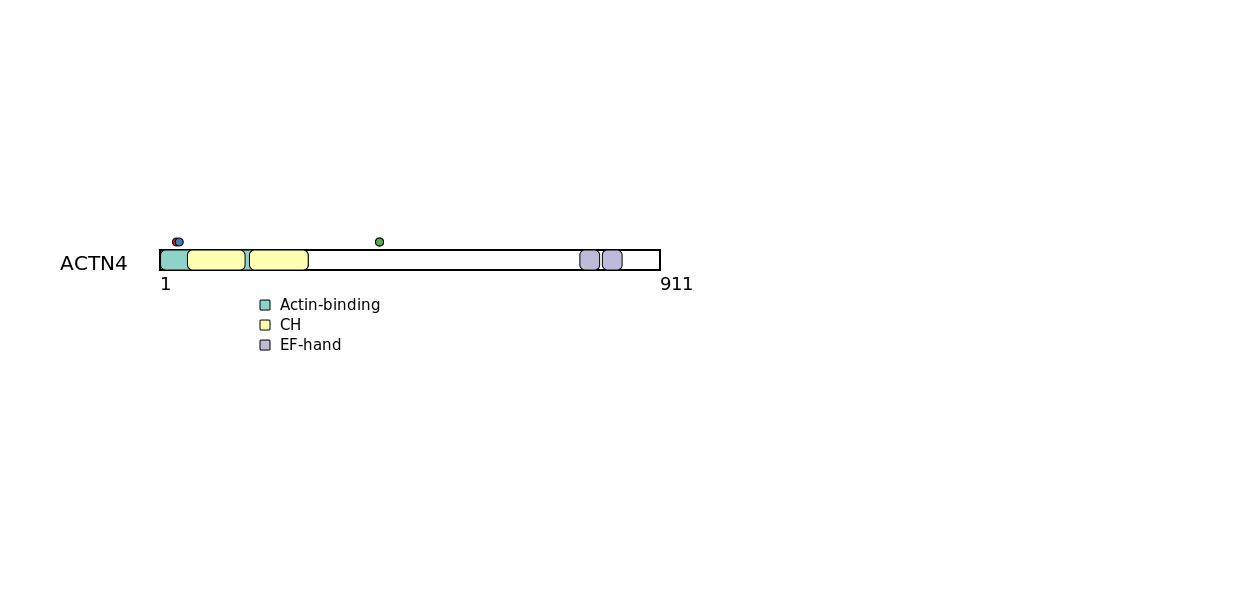

In [88]:
for idx, row in df_mutation.iterrows():
    dwg.add(dwg.circle(center=(x0 + length * row['pos'] / prolen, y0 - 8),
                       r=4,
                       stroke='black',
                       fill=row['color']))

dwg.save()
display(SVG('test.svg'))

### sample legend

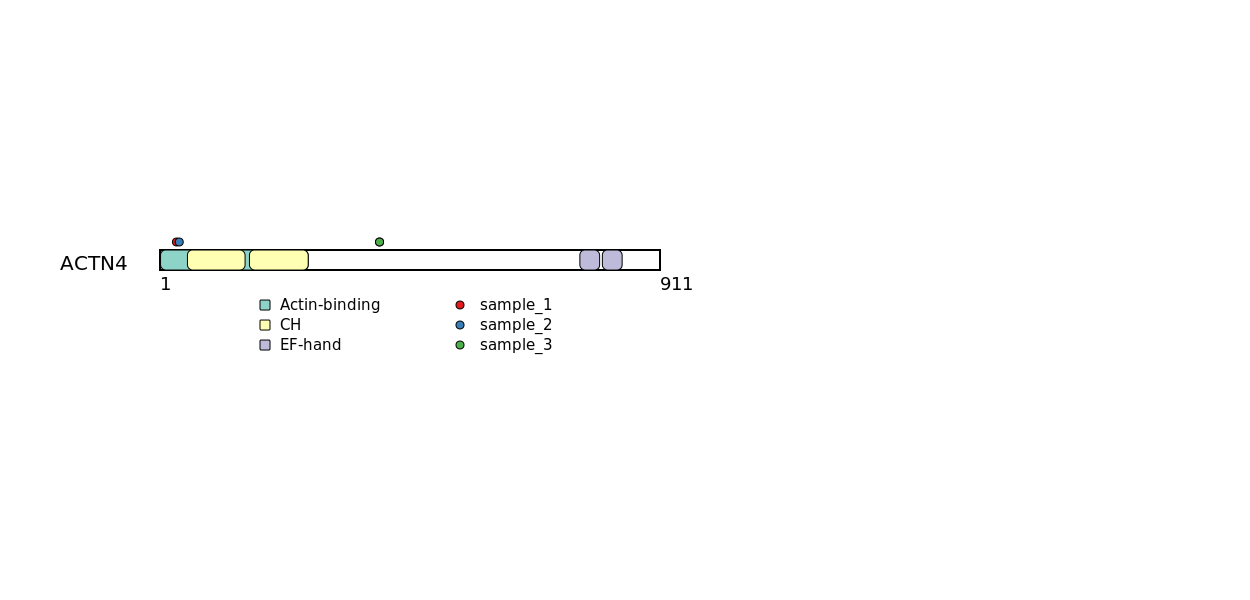

In [89]:
for idx, row in df_mutation.drop_duplicates('sample').iterrows():
    # sample legend shape
    dwg.add(dwg.circle(center=(x0 + 300, y0 + 55 + 20 * row['sample_idx']),
                       r=4,
                       stroke='black',
                       fill=row['color']))

    # sample legend text
    dwg.add(dwg.text(row['sample'],
                     insert=(x0 + 320, y0 + 60 + 20 * row['sample_idx']),
                     style="font-size:15"))

dwg.save()
display(SVG('test.svg'))

### merge different alternative mutations of one aa

In [90]:
sr_label = df_mutation[['pos', 'aachange']].groupby('pos')['aachange'].apply(lambda x: ','.join(x))

# pos are in order
df_label = pd.DataFrame({'pos': sr_label.index, 'aachange': list(sr_label)})

# mutation text position
def calculate_dodge(array, dist):
    for i in xrange(len(array) - 1):
        if array[i+1] < array[i] + dist:
            array[i+1] = array[i] + dist
    return array

df_label['pos_dodge'] = calculate_dodge(df_label['pos'].tolist(), min_distance)

df_label

,aachange,pos,pos_dodge
0,G30Y,30,30
1,N35L,35,55
2,"A400E,A400G",400,400


### mutation line and text

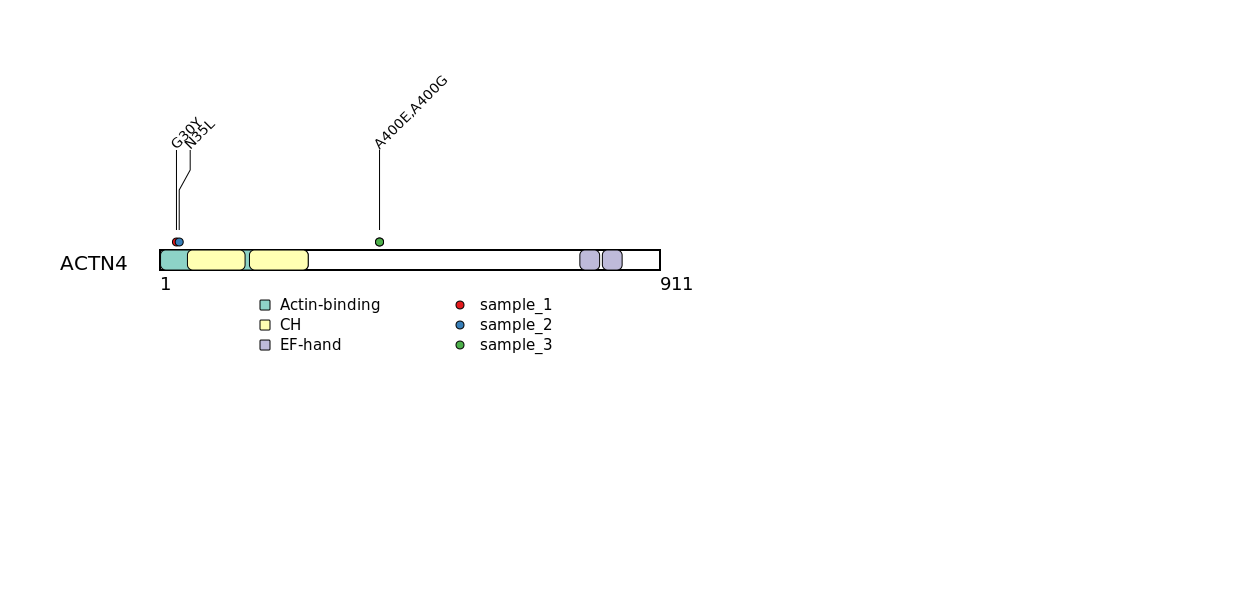

In [91]:
for idx, row in df_label.iterrows():
    # bug: must be int
    x1 = x0 + int(row['pos']) * length / prolen
    x2 = x0 + int(row['pos_dodge']) * length / prolen
    # line
    dwg.add(dwg.polyline([(x1, y0 - 20), (x1, y0 - 60), (x2, y0 - 80), (x2, y0 - 100)],
                         fill='none',
                         stroke='black'))
    
    # text
    text = dwg.add(dwg.text(row['aachange'],
                            insert=(x2, y0 - 100),
                            style="font-size:14"))
    # rotate text
    text.rotate(315, (x2, y0 - 100))

dwg.save()
display(SVG('test.svg'))